# **Import Dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve





df = pd.read_csv('Class-smell.csv')
print("Shape of original DataFrame: ", df.shape)
df

Shape of original DataFrame:  (91790, 49)


,Unnamed: 0,Address,Brain Class,Data Class,Futile Abstract Pipeline,Futile Hierarchy,God Class,Schizofrenic Class,ABUSEINH,AMW,...,NrBM,NrEC,NrFE,NrIC,NrSS,PNAS,SCHIZO,TCC,WMC,WOC
0,4,org.apache.ambari.log4j.hadoop.mapreduce.jobhi...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,0.00,2,0.00,3,1.0
1,46,org.apache.ambari.msi.StateProvider,0,0,0,0,0,1,0,0.0,...,0,0,0,0,0,-1.00,3,0.00,0,1.0
2,73,org.apache.ambari.server.controller.AbstractRo...,0,0,0,1,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,1.0
3,87,org.apache.ambari.server.controller.internal.A...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,4,0.14,9,1.0
4,89,org.apache.ambari.server.controller.internal.H...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,2,0.71,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91785,303145,org.apache.bookkeeper.common.testing.annotatio...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,0.0
91786,302625,com.scurrilous.circe.params.SipHash24Parameters,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.67,0,0.00,5,1.0
91787,63756,org.springframework.security.oauth.provider.to...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.00,0,0.00,1,0.0
91788,25671,org.eclipse.mylyn.internal.github.ui.gist.Crea...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,-1.00,0,1.00,2,0.0


# **Create new label 'IsCodeSmell'**

In [3]:
smell_columns = [
    'Brain Class', 'Data Class', 'Futile Abstract Pipeline', 'Futile Hierarchy',
    'God Class', 'Schizofrenic Class'
]

df['IsCodeSmell'] = df[smell_columns].max(axis=1)

df = df.drop(columns=['Unnamed: 0', 'Address'] + smell_columns)
print("Shape after preprocessing: ", df.shape)
df

Shape after preprocessing:  (91790, 42)


,ABUSEINH,AMW,ATFD,BOvM,BUR,CBO,CC,CM,CRIX,DAC,...,NrEC,NrFE,NrIC,NrSS,PNAS,SCHIZO,TCC,WMC,WOC,IsCodeSmell
0,0,1.0,1,0,1.0,1,0,0,0.0,1,...,0,0,0,0,0.00,2,0.00,3,1.0,1
1,0,0.0,0,0,1.0,0,1,7,0.0,0,...,0,0,0,0,-1.00,3,0.00,0,1.0,1
2,0,0.0,0,0,1.0,0,3,4,0.0,0,...,0,0,0,0,-1.00,0,0.00,0,1.0,1
3,0,1.0,0,0,1.0,5,0,0,0.0,1,...,0,0,0,0,-1.00,4,0.14,9,1.0,1
4,0,1.0,1,0,1.0,5,0,0,0.0,1,...,0,0,0,0,-1.00,2,0.71,9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91785,0,0.0,0,0,1.0,0,0,0,0.0,0,...,0,0,0,0,-1.00,0,0.00,0,0.0,0
91786,0,1.0,0,0,1.0,0,0,0,0.0,0,...,0,0,0,0,0.67,0,0.00,5,1.0,0
91787,0,1.0,0,0,1.0,0,0,0,0.0,0,...,0,0,0,0,0.00,0,0.00,1,0.0,0
91788,0,1.0,4,0,1.0,5,0,0,0.0,1,...,0,0,0,0,-1.00,0,1.00,2,0.0,0


# **Label Distribution**

C:\Users\PC\AppData\Local\Temp\ipykernel_14592\391680369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='IsCodeSmell', palette='Set2')


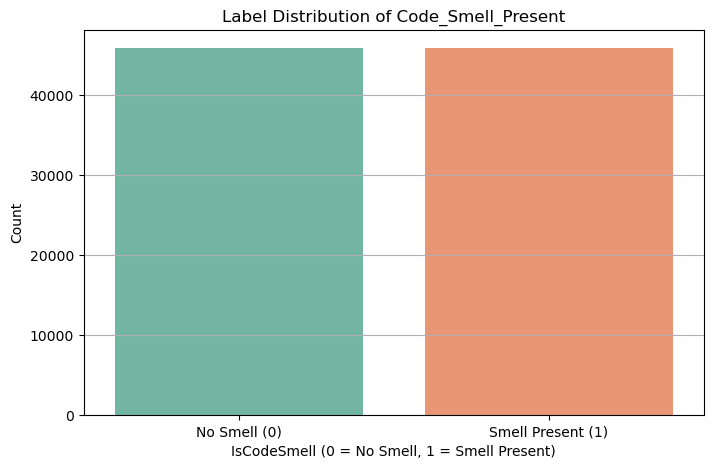

IsCodeSmell
1    45895
0    45895
Name: count, dtype: int64

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='IsCodeSmell', palette='Set2')
plt.title('Label Distribution of Code_Smell_Present')
plt.xlabel('IsCodeSmell (0 = No Smell, 1 = Smell Present)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Smell (0)', 'Smell Present (1)'])
plt.grid(axis='y')
plt.show()
df['IsCodeSmell'].value_counts()

# **Split features and target**

In [5]:
X = df.drop(columns=['IsCodeSmell'])
y = df['IsCodeSmell']

## **Split into Train and Test**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Evaluate Function**

In [7]:
def evaluate_model(model, X_test, y_test, model_name='Model'):
    """
    Trains and evaluates the given model, and displays performance metrics.
    """

   # Make predictions on training data
    y_train_pred = model.predict(X_train)

    # Make predictions on test data
    y_test_pred = model.predict(X_test)

    # Calculate and display metrics for training data
    print(f"--- Performance of {model_name} on Training Data ---")
    print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
    print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

    # Calculate and display metrics for test data
    print(f"\n--- Performance of {model_name} on Test Data ---")
    print("Testing Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion Matrix for Training Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix for Test Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Testing Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC Score for Test Data
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

# **Random Forest**

Feature Importances:
      Feature  Importance
37     SCHIZO    0.365401
8        CRIX    0.227660
18       LOCC    0.075178
23       NOAM    0.071432
22        NOA    0.051607
40        WOC    0.039689
26        NOM    0.029491
27       NOPA    0.029168
39        WMC    0.028967
1         AMW    0.010504
12     FANOUT    0.008006
38        TCC    0.007144
5         CBO    0.005879
9         DAC    0.004263
7          CM    0.003483
24        NOD    0.003482
2        ATFD    0.003468
20      NAbsM    0.003392
6          CC    0.003347
10        DIT    0.003155
25       NODD    0.002970
30     NTempF    0.002847
14     GREEDY    0.002806
13        FDP    0.002566
36       PNAS    0.002422
31       NrBM    0.002164
28     NProtM    0.002092
16        HIT    0.001867
19        NAS    0.001669
4         BUR    0.001188
33       NrFE    0.000970
3        BOvM    0.000476
29     NSPECM    0.000474
34       NrIC    0.000217
35       NrSS    0.000211
21        NDU    0.000149
32       NrEC    

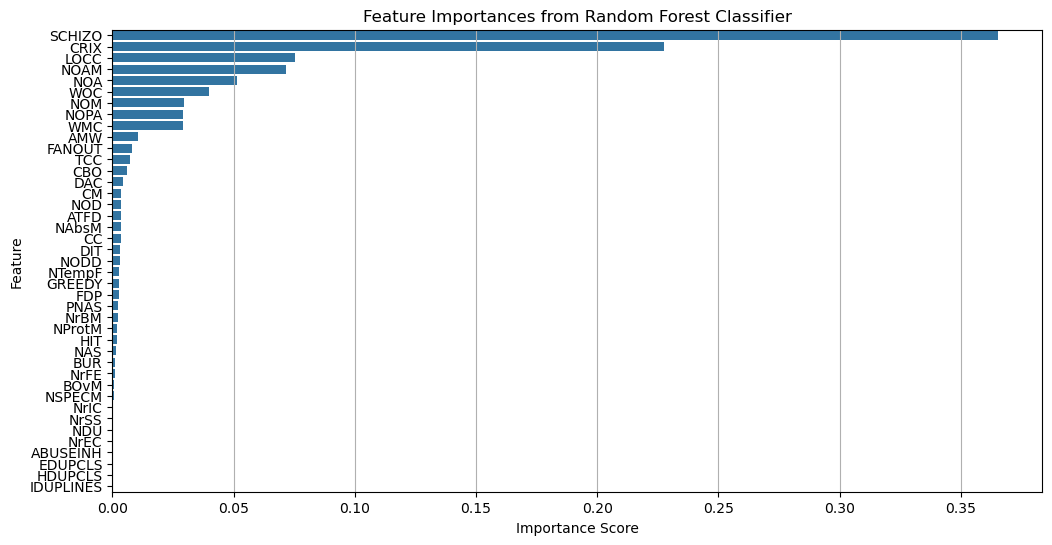

Cross-Validation Scores: [0.99516579 0.99537006 0.99509737 0.99639112 0.99543783]
Mean Cross-Validation Score: 0.995492434483889
--- Performance of Random Forest Classifier on Training Data ---
Training Accuracy Score: 0.9999455278352761
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36717
           1       1.00      1.00      1.00     36715

    accuracy                           1.00     73432
   macro avg       1.00      1.00      1.00     73432
weighted avg       1.00      1.00      1.00     73432


--- Performance of Random Forest Classifier on Test Data ---
Testing Accuracy Score: 0.9962958927987798
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      9178
           1       1.00      0.99      1.00      9180

    accuracy                           1.00     18358
   macro avg       1.00      1.00      1.00    

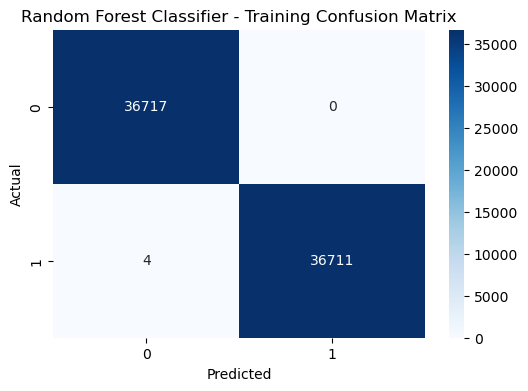

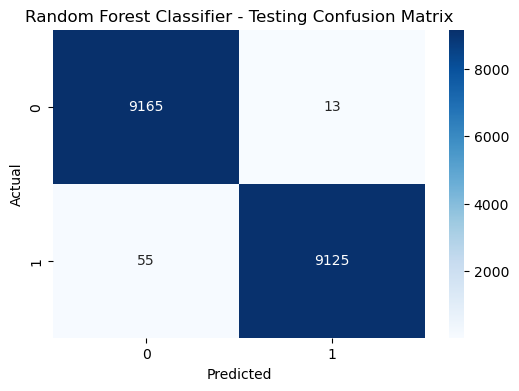

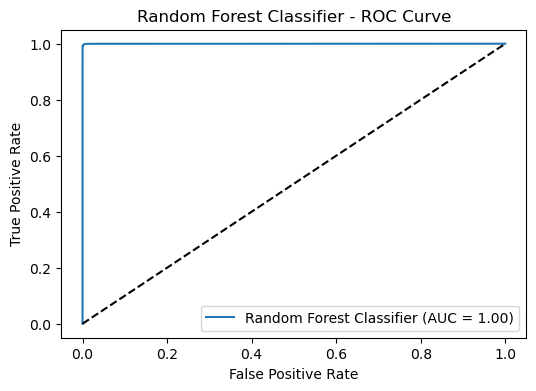

In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()




# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


evaluate_model(rf_model, X_test, y_test, model_name='Random Forest Classifier')

# **Gradient Boosting**

--- Performance of Gradient Boosting Classifier on Training Data ---
Training Accuracy Score: 0.9961188582634274
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     36717
           1       1.00      0.99      1.00     36715

    accuracy                           1.00     73432
   macro avg       1.00      1.00      1.00     73432
weighted avg       1.00      1.00      1.00     73432


--- Performance of Gradient Boosting Classifier on Test Data ---
Testing Accuracy Score: 0.9964593092929513
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      9178
           1       1.00      0.99      1.00      9180

    accuracy                           1.00     18358
   macro avg       1.00      1.00      1.00     18358
weighted avg       1.00      1.00      1.00     18358



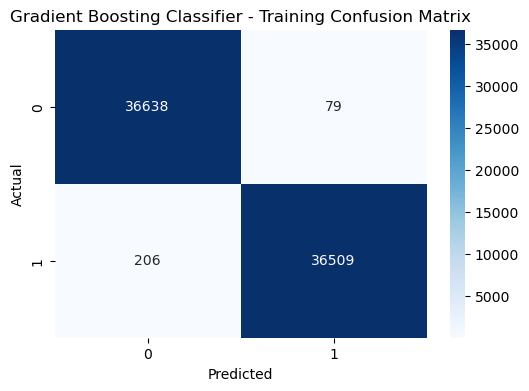

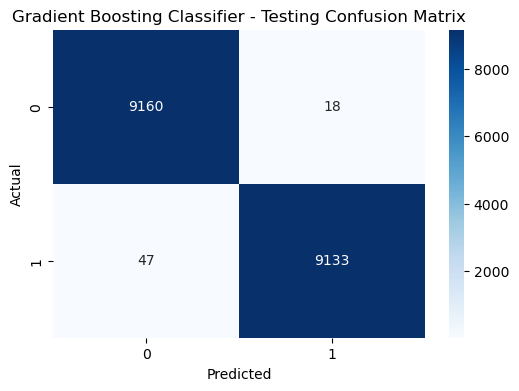

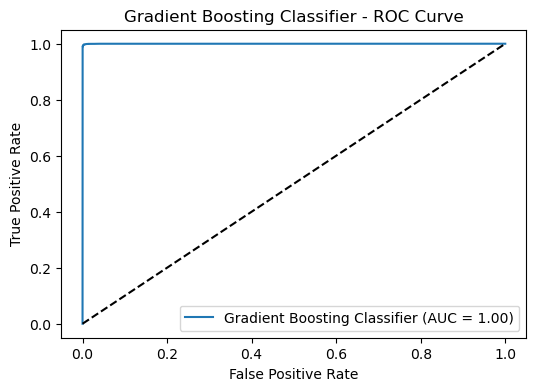

In [9]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


evaluate_model(gb_model, X_test, y_test, model_name='Gradient Boosting Classifier')


# **Logistic Regression**

--- Performance of Logistic Regression on Training Data ---
Training Accuracy Score: 0.9552511166793768
Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     36717
           1       0.95      0.96      0.96     36715

    accuracy                           0.96     73432
   macro avg       0.96      0.96      0.96     73432
weighted avg       0.96      0.96      0.96     73432


--- Performance of Logistic Regression on Test Data ---
Testing Accuracy Score: 0.9572393506917964
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      9178
           1       0.95      0.96      0.96      9180

    accuracy                           0.96     18358
   macro avg       0.96      0.96      0.96     18358
weighted avg       0.96      0.96      0.96     18358



d:\Apps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


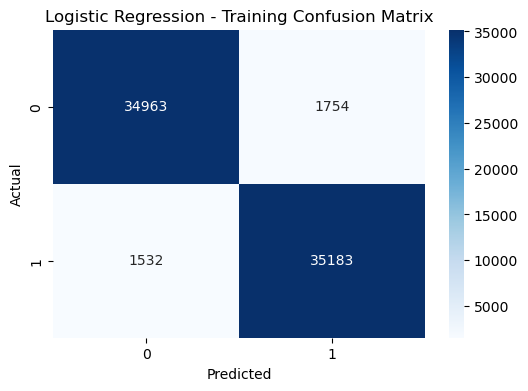

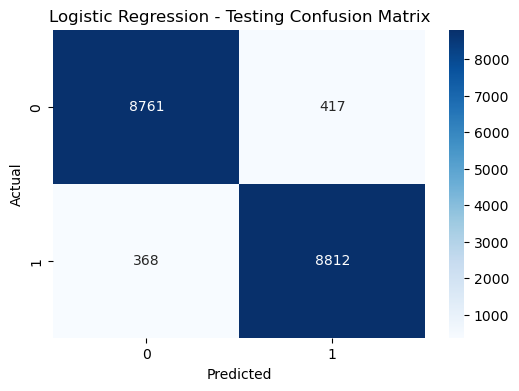

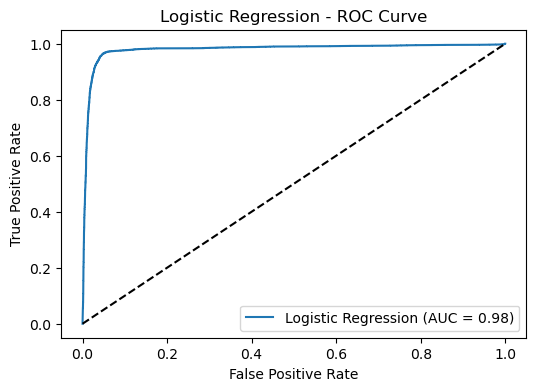

In [10]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

evaluate_model(lr_model, X_test, y_test, model_name='Logistic Regression')

# **Multi-Layer Perceptron (MLP)**

--- Performance of Multi-Layer Perceptron (MLP) Classifier on Training Data ---
Training Accuracy Score: 0.9977394051639612
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36717
           1       1.00      1.00      1.00     36715

    accuracy                           1.00     73432
   macro avg       1.00      1.00      1.00     73432
weighted avg       1.00      1.00      1.00     73432


--- Performance of Multi-Layer Perceptron (MLP) Classifier on Test Data ---
Testing Accuracy Score: 0.9963503649635036
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9178
           1       1.00      1.00      1.00      9180

    accuracy                           1.00     18358
   macro avg       1.00      1.00      1.00     18358
weighted avg       1.00      1.00      1.00     18358



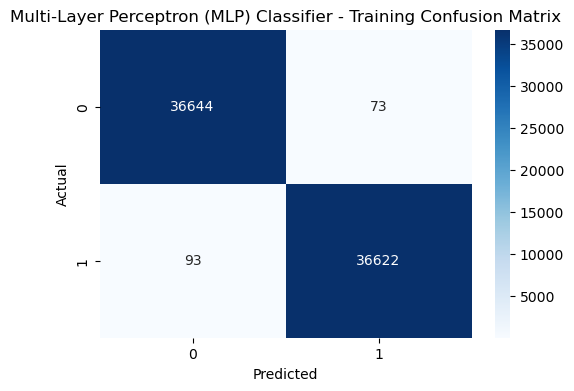

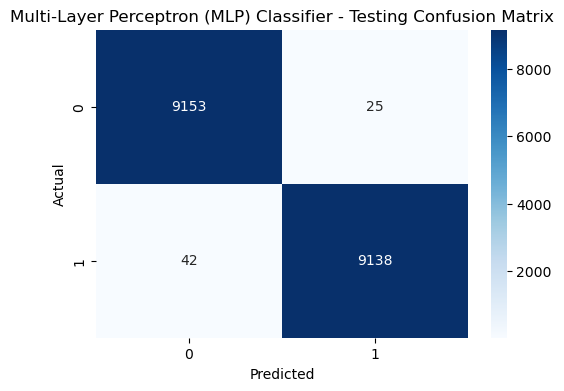

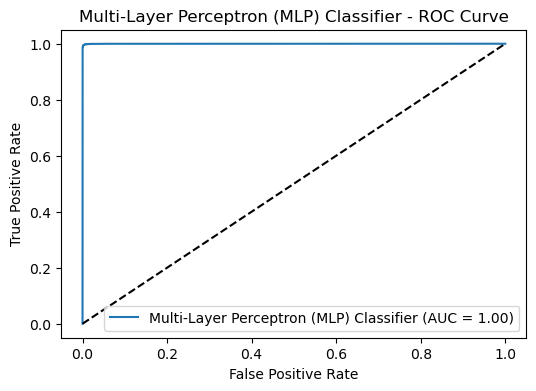

In [11]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)


evaluate_model(mlp_model, X_test, y_test, model_name='Multi-Layer Perceptron (MLP) Classifier')


# **AdaBoost Classifier**

d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- Performance of AdaBoost Classifier on Training Data ---
Training Accuracy Score: 0.9947570541453318
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     36717
           1       1.00      0.99      0.99     36715

    accuracy                           0.99     73432
   macro avg       0.99      0.99      0.99     73432
weighted avg       0.99      0.99      0.99     73432


--- Performance of AdaBoost Classifier on Test Data ---
Testing Accuracy Score: 0.9948251443512365
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9178
           1       1.00      0.99      0.99      9180

    accuracy                           0.99     18358
   macro avg       0.99      0.99      0.99     18358
weighted avg       0.99      0.99      0.99     18358



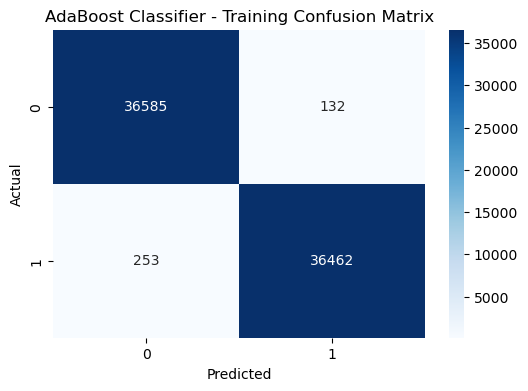

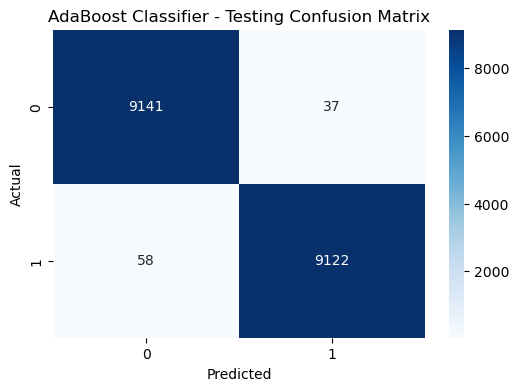

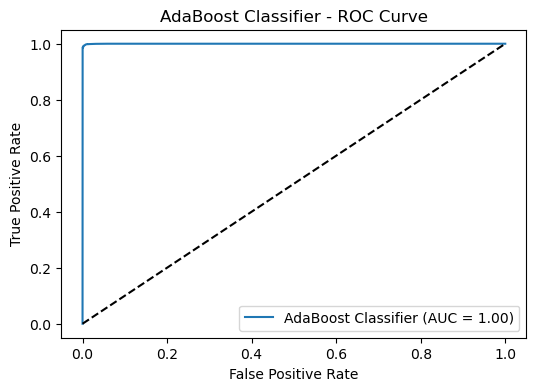

In [12]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)


evaluate_model(ada_model, X_test, y_test, model_name='AdaBoost Classifier')


# **Support Vector Machine (SVM)**